In [78]:
#Agenda
#working with directories
#serialization-deserialization
#pickling
#logging and Exception handling


In [80]:
#Earlier in the last class we worked with text files
#the image reading is not possible in text mode
#similary it is aslo not possible to read other data type int, float, list, tuples


In [82]:
with open("image.png",'r') as file:
    file.read()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x89 in position 0: invalid start byte

In [84]:
#the above command with throw an error >> r mode works with text data


In [86]:
with open('file.txt','w') as file:
    file.write('india is great')

In [88]:
with open('file.txt','w') as file:
    file.write(5)

#this will throw an error because it works with string data

TypeError: write() argument must be str, not int

In [90]:
with open('file.txt','w') as file:
    file.write('10')

In [92]:
with open('file.txt','r') as file:
    print(file.read()+10)

#it means the value 10 inside the string is int

TypeError: can only concatenate str (not "int") to str

In [94]:
with open('file.txt','r') as file:
    print(int(file.read())+20)

#it will not throw an error as you converted into integer and then adding int
#but this will not work in every case

30


In [96]:
#solution either convert to string or use writeline
student = {
    "name": "Rajkumar",
    'age' : 31,
    'gender': 'Male'
}

with open('student.txt','w') as file:
    file.write(str(student))

In [98]:
student = {
    "name": "Rajkumar",
    'age' : 32,
    'gender': 'Male'
}

with open('student.txt','w') as file:
    file.writelines(str(student))

In [100]:
# lines = ["Name: Rajkumar\n", "Age: 32\n", "Gender: Male\n"]

# with open("student.txt", "w") as f:
#     f.writelines(lines)   # Correct use of writelines


In [102]:
#now read the same file >> it will return string, try convertingto dictionary it will throw an error
with open('student.txt') as file:
    s=file.read()

In [104]:
type(s)

str

In [106]:
dict(s)

ValueError: dictionary update sequence element #0 has length 1; 2 is required

In [108]:
with open('student.txt','r') as file:
    print(dict(file.read()))

ValueError: dictionary update sequence element #0 has length 1; 2 is required

In [110]:
#whenever you read/write a text file >> we work in RAM and store back in ROM
#it expects string and we are providing a dictionary in string formate
#when it write back to RAM, the dictionalry structure(key-value) is lost
#so when you read again and try to convert to dictionary it throws an error

In [112]:
#serialization and deserialisation (asked in fang)
#JSON, or JavaScript Object Notation, is a file formate and data interchange format that uses human readable
#text to store and transmit data
#JASON look like dictionary


#serialization >> process of converting any python data type into JSON format
#In compution, serialization (or serialisation, also referred tto as pickling in python) is the process of
#translating a data structure or object state into a format that can be stored (e.g. file in secondary
#storage devices, data buffers in primary storage devices) or transmitted (e.g. data streams over computer
# networks) and reconstructed later (pssibly in a different computer environment).


#deserialisation >> process of converting json format to orginal python datatype


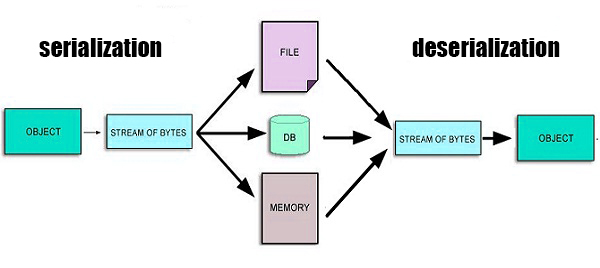

In [115]:
#stream of bytes means collection of bits means multiple 0's and 1's


Jason Structure
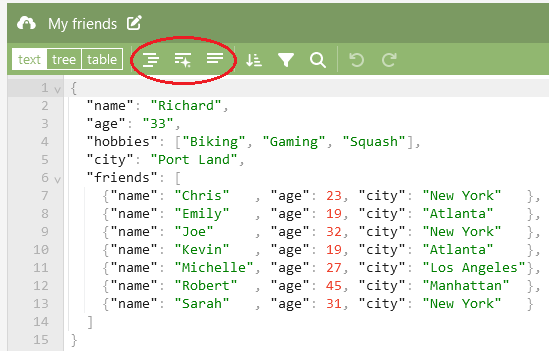

In [118]:
import json #json is a module using which u can store the data in dict format
#json.dump
#serialize `` obj `` as a json formated stream

student = {
    "name": "Rajkumar",
    'age' : 32,
    'gender': 'Male'
}

with open('student.json','w') as file:
    json.dump(student,file)

In [120]:
student = {
    "name": "Rajkumar",
    'age' : 32,
    'gender': 'Male'
}

with open('student.json','w') as file:
    json.dump(student,file,indent = 4) #indent to store dictionary in the orginal formate with indentation
#4space is 1 tab

In [122]:
#writing was never a problem
#problem was writing in the orginal structure so that while reading ,the structure remains intact

#deserialisation

with open("student.json",'r') as file:
    d = json.load(file)
    print(d)
    print(type(d))

{'name': 'Rajkumar', 'age': 32, 'gender': 'Male'}
<class 'dict'>


# Industry Use Case
- while working with file and database, you will be always using json format format for data structures other than
- string

In [125]:
raj = {
    'Name' : 'RajKumar',
    'age' : 23,
    'domain': 'DataScience'
}
with open('raj.json','w') as file:
    json.dump(raj,file)

In [127]:
with open('raj.json','r') as file:
    d = json.load(file)
    print(d)
    print(type(d))

{'Name': 'RajKumar', 'age': 23, 'domain': 'DataScience'}
<class 'dict'>


In [129]:
student = {
    'name':'Rajkumar',
    'course':['ML','DL','CV']
}
with open('student.json','w') as file:
    json.dump(student,file)

In [131]:
#Storing list, tuples
student = ('Raj','Simran','Monjolika')
with open('student1.json','w') as file:
    json.dump(student,file)

In [133]:
student = ['Raj','Simran','Monjolika']
with open('student1.json','w') as file:
    json.dump(student,file)

In [135]:
# serialisation and deserialisation of custom object

In [137]:
class Student:

    def __init__(self, name, age, gender):
        self.name = name
        self.gender = gender
        self.age = age

In [139]:
s = Student("Sada",31,"Male")

In [141]:
#I want the object to be stored and shown in this format
#name:sada, gender:male, age:31
#each time you make an object the data is stored in the above format of the class student



In [143]:
#The following will give you an error >> TypeError : Object of type Student is not JSON serializable
#because json does't knoww how class Student look like
#it does not know the class , the how ti will store object


with open("stundet.json",'w') as file:
    json.dump(s,file)                  

TypeError: Object of type Student is not JSON serializable

In [145]:
#solution
#I want the object to be stored and shown in this format
#name:sada, gender:male, age:31
#each time you make an object the data is stored in the above format of the class student


# isinstance : Return whether an object is an instance of a class 
#or of a subclass.

def stud_structure(student):
    if isinstance(student,Student): # if student object is of class student
        return{"name":student.name,"gender":student.gender,"Age":student.age}
    

with open('student.json','w') as file:
    json.dump(s,file,default = stud_structure)

In [147]:
d = {"name":"Ajay"}
print(type(d))
isinstance(d,dict)

<class 'dict'>


True

In [149]:
a = 2
isinstance(a,dict)

False

In [151]:
# we have to provide stud_structure while dumping, so that json knows the structure
def stud_structure(student):
    if isinstance(student,Student): # if student object is of class student
        return{"name":student.name,"gender":student.gender,"Age":student.age}
    

with open('student.json','w') as file:
    json.dump(s,file,default = stud_structure)

In [153]:
#pickling (******vip****) >> conversion of python object into byte stream/ stores the state of object
#and unpickling  means reverse


In [155]:
class Student:

    def __init__(self, name, age):
        self.name = name
        self.age = age

    def info(self):
        print("hello everyone, my name is ", self.name, "and I am ",self.age," years old")

In [157]:
s = Student('Sada',31)
s.info()

hello everyone, my name is  Sada and I am  31  years old


In [159]:
import pickle
with open("student.pkl",'wb') as file:  # wb means write binary mode
    pickle.dump(s,file)


In [161]:
#pickle load
with open("student.pkl",'rb') as file:
    p = pickle.load(file)

print(type(p))

p.info()

<class '__main__.Student'>
hello everyone, my name is  Sada and I am  31  years old


In [163]:
#industry use case
#let say you made a ML model and you have done hyperparameter tune
#The pickle will store all the tuned hyperparameter

#JSON lets user to store the data in human readable formate
#pickle store the data in binary format

#advantage of pickle
#to ship ml models to be used by other users
#state remains intact
#security is not compromised >> as its encrypted to 1,0 format

# Reading and Writing diff type of file

In [174]:
#text file
text = """
I am a student
I am studying in data science
"""

In [176]:
with open("exp.txt",'w') as file:
    file.write(text)

In [184]:
with open('exp.txt','r') as file:
    data = file.read()
print(data)


I am a student
I am studying in data science



In [190]:
# csv file (comma separated values file)
data = [["name","Course",'Fee'],
        ["Monjolika",'DS',"5000"],
        ['Ajay','SQL','799']]
for i in data:
    print(i)

['name', 'Course', 'Fee']
['Monjolika', 'DS', '5000']
['Ajay', 'SQL', '799']


In [195]:
import csv

with open('exp_csv.csv','w') as file:
    w = csv.writer(file)
    for i in data:
        w.writerow(i)

In [210]:

with open("exp_csv.csv", "r") as file:
    r = csv.reader(file)
    for i in r:
        print(i)  

['name', 'Course', 'Fee']
['Monjolika', 'DS', '5000']
['Ajay', 'SQL', '799']


In [212]:

#json >> javascript object orientation
data = {"name":"Ajay",
       "sex":'Male'}

In [228]:
import json
with open('exp_json.json','w') as file:
    json.dump(data,file)

In [230]:
with open("exp_json.json",'r') as file:
    data = json.load(file)
print(data)

{'name': 'Ajay', 'sex': 'Male'}


In [232]:
#reading and writing binary files

with open("exp4.bin", "wb") as file:
    file.write(b"\x48\x65\x6c\x6c\x6f\x2c\x20\x57\x6f\x72\x6c\x64\x21")

In [234]:
with open("exp4.bin", "rb") as file:
    print(file.read())

b'Hello, World!'


In [236]:
# writing and reading yaml files
#yaml(Yet Another Markup Language)>> it is commonly used for configurational files and
#in application wheres data is being stored or transmitted
# commonaly in installation of any apps/softwares

In [256]:
#writing yaml files
import yaml
data  = {'name':'Ajay','gender':'male'}
with open('exp5.yaml','w') as file:
    yaml.dump(data,file)


In [258]:
with open('exp5.yaml','r') as file:
    data = yaml.safe_load(file)
print(data)

{'gender': 'male', 'name': 'Ajay'}


In [260]:
#use case >> devops and data engineering  >> installation files

In [262]:
# reading and writing xml file (Extensible markup language)
#XML files are files that use Extensible Markup Language (XML) to store,
# transmit, and reconstruct data. XML is a markup language that defines rules for 
# encoding docu-ments so that they can be read by both humans and ma-chines. 
# XML files are plain text files that can be generated and stored by a standard web server.

In [269]:
#reading and writing parquet files
#parquet files is a type of compressed
#A Parquet file is a column-oriented data storage format that is open source and free

import pandas as pd
df = pd.DataFrame({"Name":['Ajay','Bijay']})
df

,Name
0,Ajay
1,Bijay


In [271]:
df.to_parquet("exp6.parquet")

In [275]:
df = pd.read_parquet("exp6.parquet")
df

,Name
0,Ajay
1,Bijay


In [277]:
#parquet is alternative to csv and excel file
#alternative to pandas to read/write a parquet file is Pyspark

In [283]:
#reading and writing excel file

from openpyxl import Workbook, load_workbook

#writing excel file
wb = Workbook()
ws=wb.active
ws.append(["Name", "Age", "City"])
ws.append(["Alice", 25, "New York"])
wb.save("example_excel.xlsx")


#reading excel
wb = load_workbook("example_excel.xlsx")
ws = wb.active
for row in ws.iter_rows(values_only=True):
    print(row)


('Name', 'Age', 'City')
('Alice', 25, 'New York')


In [287]:
# if your file is more than your ram than you use readlines one by one
# while reading/writing  files, file is loaded in buddered memory of ram
#buffered reading >> it allows the program to read the data in chunks
#buffered writinf >> it allows the program to write the data in chunks


In [317]:
import io
with open('final_exp.txt','wb') as f:
    file = io.BufferedWriter(f)
    file.write(b"Custom data types are allowed, but YAML natively encodes scalars (such as strings, integers, and floats), lists, and associative arrays (also known as maps, dictionaries or hashes). These data types are based on the Perl programming language, though all commonly used high-level programming languages share very similar concepts.[5][6][7] The colon-centered syntax, used for expressing key-value pairs, is inspired by electronic mail headers as defined in RFC 822, and the document separator --- is borrowed from MIME (RFC 2046). Escape sequences are reused from C, and whitespace wrapping for multi-line strings is inspired by HTML. ")
    file.write(b"hello world")
    file.write(b'CareerCraft classes')
    file.flush() #optional >> flush () clean out your RAM buffer

In [319]:
with open('final_exp.txt','rb') as f:
    file = io.BufferedReader(f)
    data = file.read(150) # first 100 bytes
print(data)

b'Custom data types are allowed, but YAML natively encodes scalars (such as strings, integers, and floats), lists, and associative arrays (also known as'


In [321]:
#use case >> whenever huge data is there, you have to use this method


In [323]:
#Working With directories
import os

In [325]:
os.getcwd()

'/Users/arpityadav/Desktop/python/NameSpace,Loging'

In [327]:
pwd

'/Users/arpityadav/Desktop/python/NameSpace,Loging'

In [329]:
ls

File Handling(serialization,Deserialisation,reading&writing diff types of files,Directories).ipynb
final_exp.txt
NameSpace,File Handling.ipynb


In [332]:
#to check the size of the file
os.path.getsize("final_exp.txt")

664

In [334]:
#to make another folder
os.mkdir("test")

In [339]:
os.mkdir("test/test1") #test should be present if u want to make test1 inside the test

In [345]:
os.makedirs("1/2/3/4")# if parent folder is not present and we want multiple folder

In [349]:
os.listdir()

['final_exp.txt',
 'NameSpace,File Handling.ipynb',
 'test',
 '1',
 'File Handling(serialization,Deserialisation,reading&writing diff types of files,Directories).ipynb',
 '.ipynb_checkpoints']

In [351]:
os.mkdir('ajay')

In [353]:
os.rmdir('ajay')

In [355]:
#can you delete nested directories
os.rmdir("1")

OSError: [Errno 66] Directory not empty: '1'

In [357]:
import shutil
shutil.rmtree("1")

In [359]:
os.getcwd()

'/Users/arpityadav/Desktop/python/NameSpace,Loging'

In [361]:
f = open(r'/Users/arpityadav/Desktop/python/NameSpace,Loging/test/test1/file_test.txt','w')


In [363]:
shutil.copy('/Users/arpityadav/Desktop/python/NameSpace,Loging/test/test1/file_test.txt','/Users/arpityadav/Desktop/python/NameSpace,Loging'
)

'/Users/arpityadav/Desktop/python/NameSpace,Loging/file_test.txt'

In [365]:
#use case
#say if you are training the model and while training you want to create a separate folder
# for cleaned data , you can not create folder manually and hence you have to use od to make directories or delete it

In [ ]:
#interview question
#what is serialisation, deserialisation
#diff ways of reading and writing files
# what is buffered reading and writing
#what is pickling and unpickling and how it is diff from json